# Stock Price Prediction



## Install Libraries

In [ ]:
!pip install yfinance scikit-learn matplotlib seaborn pandas numpy

## Preprocessing Data

In [ ]:
import yfinance as yf
import pandas as pd

stock_data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
stock_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914803,72.676431,71.689942,71.847102,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200
...,...,...,...,...,...
2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1257 non-null   float64
 1   (High, AAPL)    1257 non-null   float64
 2   (Low, AAPL)     1257 non-null   float64
 3   (Open, AAPL)    1257 non-null   float64
 4   (Volume, AAPL)  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [ ]:
# Flatten MultiIndex columns
stock_data.columns = stock_data.columns.get_level_values(0)
stock_data.reset_index(inplace=True)

columns_to_keep = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
stock_data = stock_data[columns_to_keep]

stock_data

Price,Date,Close,High,Low,Open,Volume
0,2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
1,2020-01-03,71.914803,72.676431,71.689942,71.847102,146322800
2,2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
3,2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
4,2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200
...,...,...,...,...,...,...
1252,2024-12-23,254.655716,255.034791,252.840088,254.156919,40858800
1253,2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
1254,2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100
1255,2024-12-27,254.974930,258.077462,252.451019,257.209530,42355300


In [ ]:
#missing values
print(stock_data.isnull().sum())

Price
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


## Plot

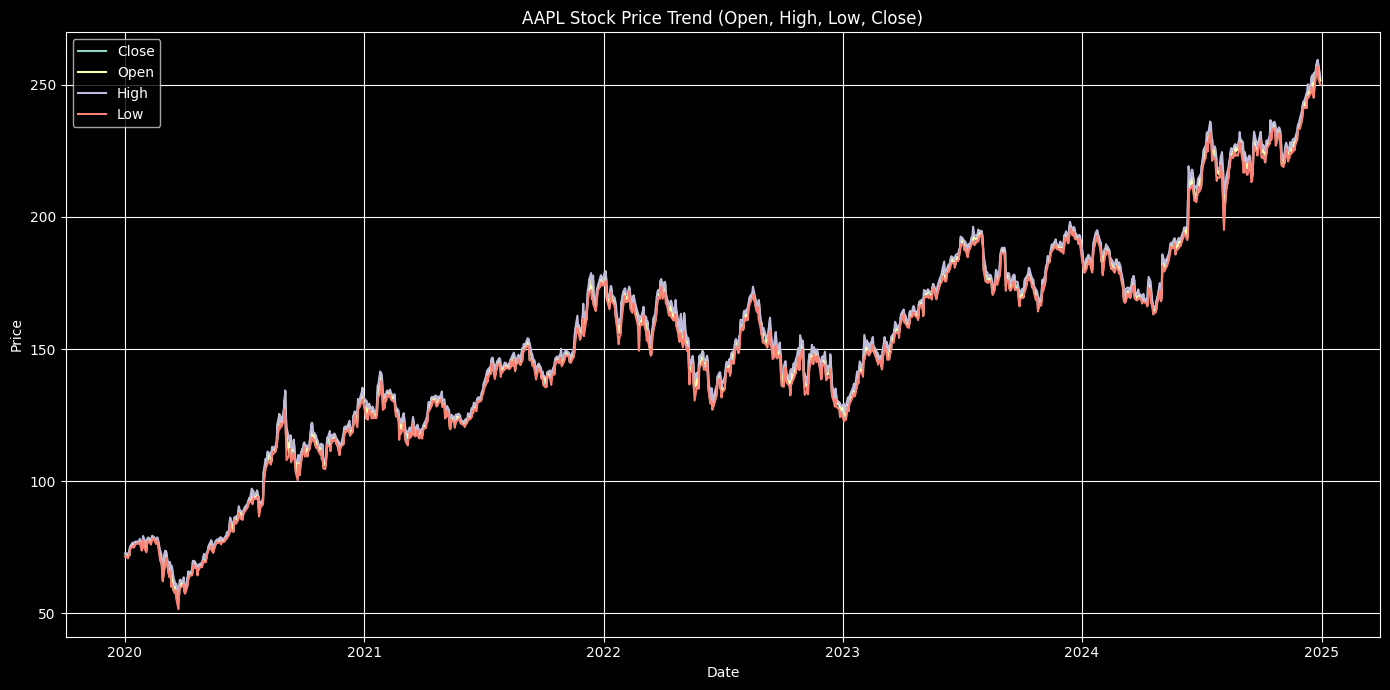

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = stock_data.copy()

plt.figure(figsize=(14, 7))

for col in ['Close', 'Open', 'High', 'Low']:
    sns.lineplot(x='Date', y=col, data=plot_df, label=col)

plt.title('AAPL Stock Price Trend (Open, High, Low, Close)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation

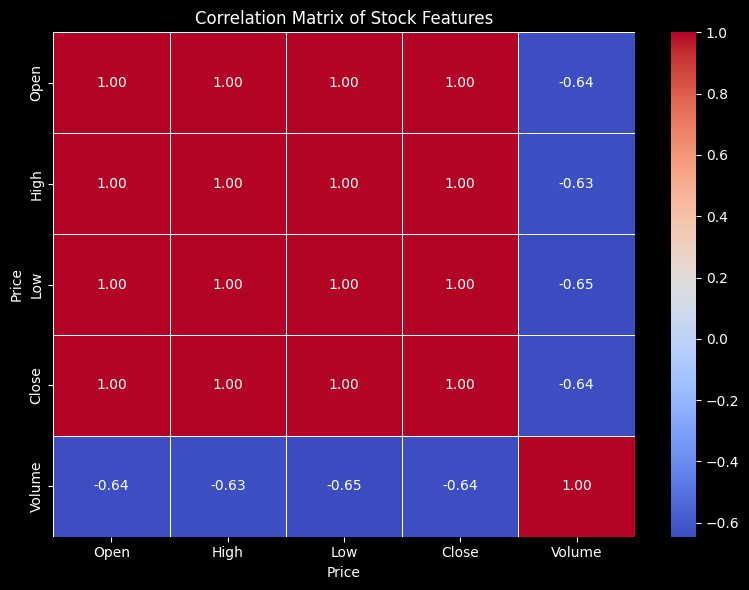

In [ ]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
corr_df = stock_data[numeric_cols]

corr_matrix = corr_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Stock Features')
plt.tight_layout()
plt.show()


## Outliers

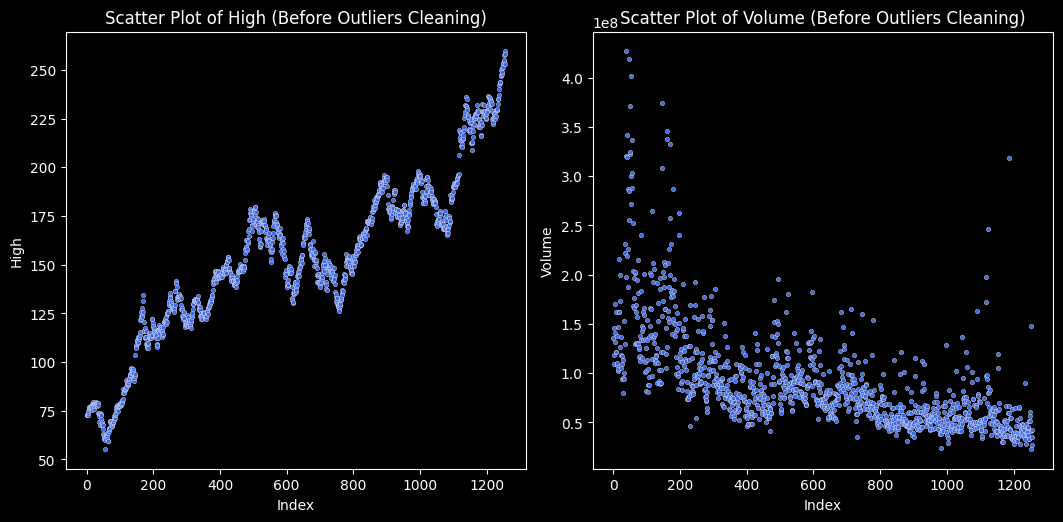

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['High', 'Volume']
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=stock_data.index, y=stock_data[col], color='royalblue', s=10)
    plt.title(f'Scatter Plot of {col} (Before Outliers Cleaning)')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


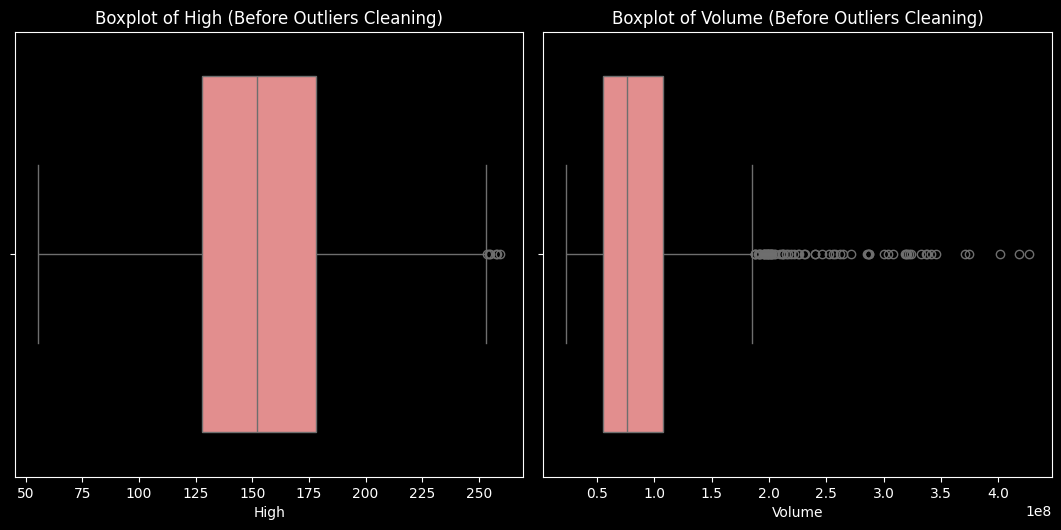

In [ ]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=stock_data[col], color='lightcoral')
    plt.title(f'Boxplot of {col} (Before Outliers Cleaning)')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from scipy import stats

cols = ['Open', 'High', 'Low', 'Close', 'Volume']

z_scores = np.abs(stats.zscore(stock_data[cols]))

z_threshold = 3

stock_data_z = stock_data[(z_scores < z_threshold).all(axis=1)]
print(f"Original rows: {len(stock_data)}, After Z-score filtering: {len(stock_data_z)}")


Original rows: 1257, After Z-score filtering: 1229


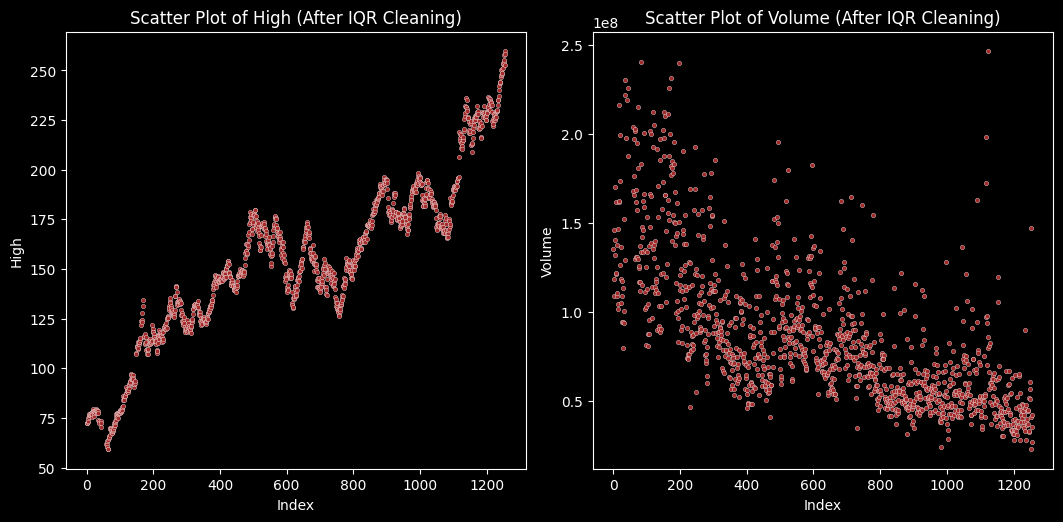

In [ ]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=stock_data_z.index, y=stock_data_z[col], color='brown', s=10)
    plt.title(f'Scatter Plot of {col} (After IQR Cleaning)')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


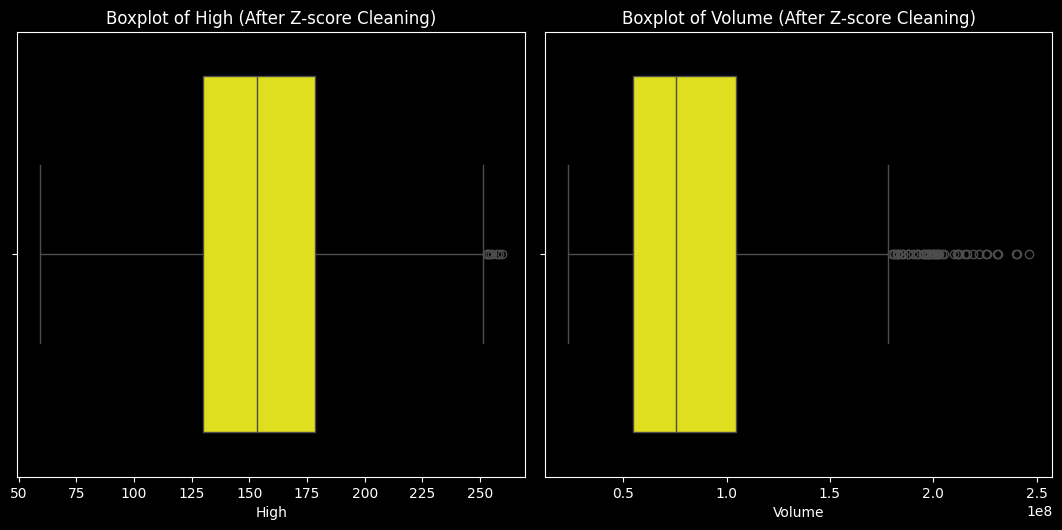

In [ ]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=stock_data_z[col], color='yellow')
    plt.title(f'Boxplot of {col} (After Z-score Cleaning)')

plt.tight_layout()
plt.show()


In [ ]:
stock_data_iqr = stock_data.copy()

cols = ['Open', 'High', 'Low', 'Close', 'Volume']

Q1 = stock_data_iqr[cols].quantile(0.25)
Q3 = stock_data_iqr[cols].quantile(0.75)
IQR = Q3 - Q1

filter_iqr = ~((stock_data_iqr[cols] < (Q1 - 1.5 * IQR)) |
               (stock_data_iqr[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

stock_data_iqr = stock_data_iqr[filter_iqr]
print(f"Original rows: {len(stock_data)}, After IQR filtering: {len(stock_data_iqr)}")


Original rows: 1257, After IQR filtering: 1181


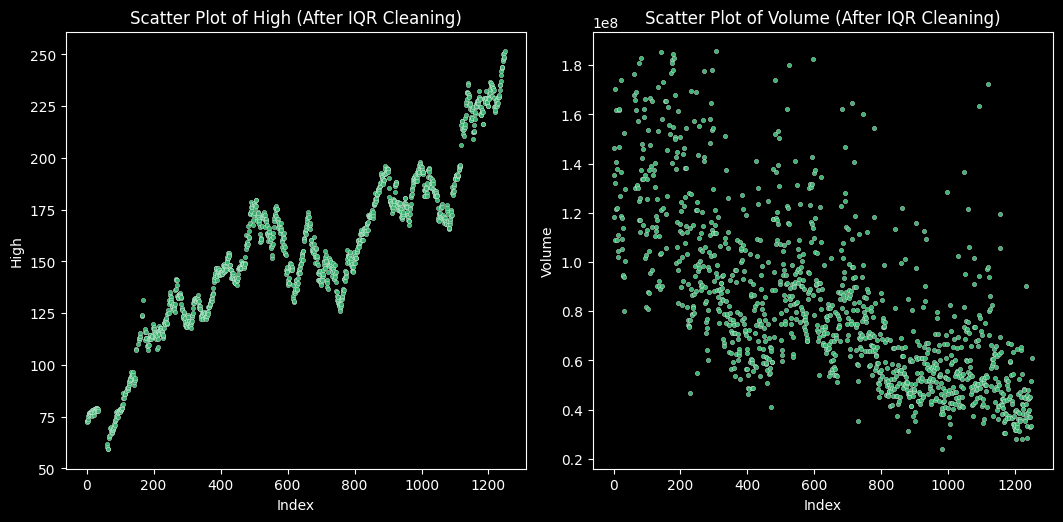

In [ ]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=stock_data_iqr.index, y=stock_data_iqr[col], color='mediumseagreen', s=10)
    plt.title(f'Scatter Plot of {col} (After IQR Cleaning)')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


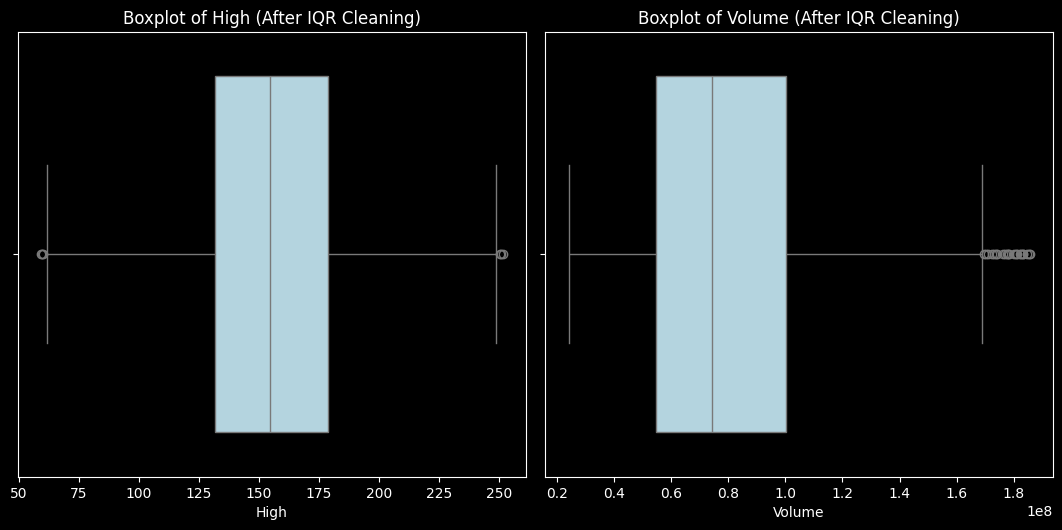

In [ ]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=stock_data_iqr[col], color='lightblue')
    plt.title(f'Boxplot of {col} (After IQR Cleaning)')

plt.tight_layout()
plt.show()


## Normalization & Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data_for_scaling = stock_data_iqr.copy()

dates = data_for_scaling['Date']
features = data_for_scaling[numeric_cols]

# Min-Max Normalization
minmax_scaler = MinMaxScaler()
scaled_minmax = minmax_scaler.fit_transform(features)
df_minmax = pd.DataFrame(scaled_minmax, columns=numeric_cols)
df_minmax['Date'] = dates.values

# Z-Score Standardization
zscore_scaler = StandardScaler()
scaled_zscore = zscore_scaler.fit_transform(features)
df_zscore = pd.DataFrame(scaled_zscore, columns=numeric_cols)
df_zscore['Date'] = dates.values


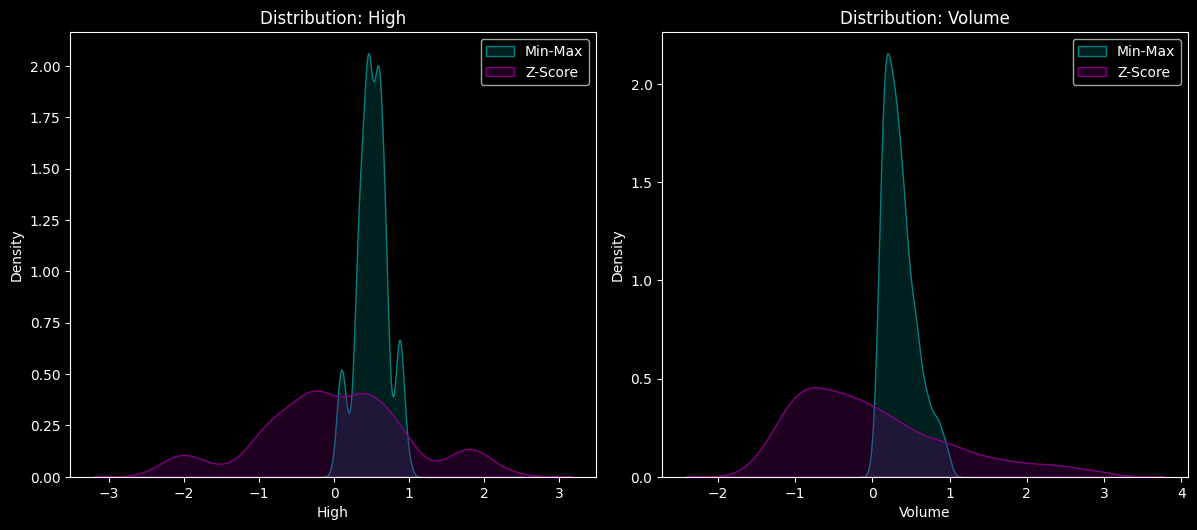

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(df_minmax[col], label='Min-Max', fill=True, color='teal')
    sns.kdeplot(df_zscore[col], label='Z-Score', fill=True, color='purple')
    plt.title(f'Distribution: {col}')
    plt.legend()

plt.tight_layout()
plt.show()


## Feature extraction

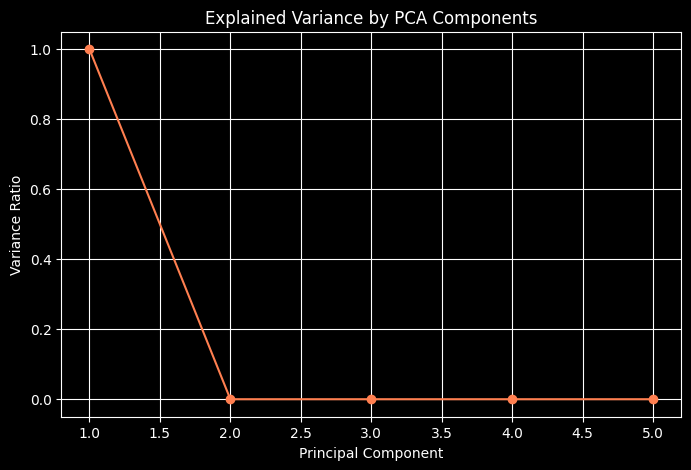

In [ ]:
from sklearn.decomposition import PCA

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
X_pca = stock_data[numeric_cols]

pca = PCA(n_components=len(numeric_cols))
X_pca_transformed = pca.fit_transform(X_pca)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(numeric_cols)+1), pca.explained_variance_ratio_, marker='o', color='coral')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.grid(True)
plt.show()



In [ ]:
X_pca = stock_data[numeric_cols]

pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_pca)

pca_2d_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_2d_df['Date'] = stock_data['Date'].values

print(pca_2d_df.head())

            PC1         PC2       Date
0  4.486591e+07 -114.471220 2020-01-02
1  5.570831e+07 -103.681713 2020-01-03
2  2.777271e+07 -132.354037 2020-01-06
3  1.825751e+07 -140.661388 2020-01-07
4  4.146471e+07 -116.723874 2020-01-08


## Feature selection

<ipython-input-165-38dc5aff43ae>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ig_df, x='Mutual Information', y='Feature', palette='viridis')


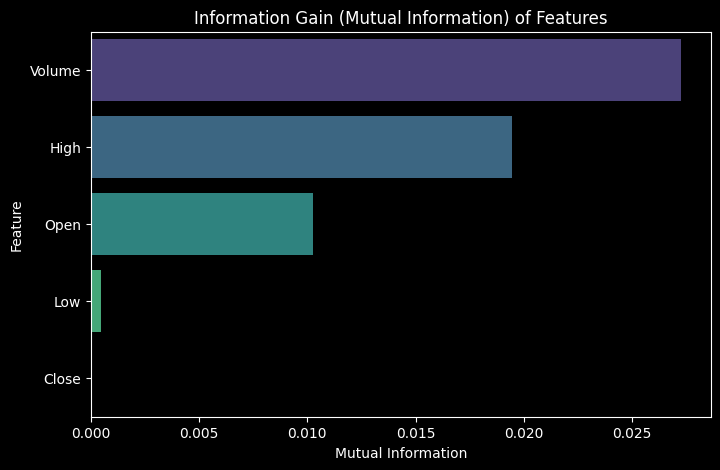

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# 1 if next day Close > current Close, else 0
stock_data['Target'] = (stock_data['Close'].shift(-1) > stock_data['Close']).astype(int)

stock_data.dropna(inplace=True)

X_ig = stock_data[numeric_cols]
y_ig = stock_data['Target']
mi_scores = mutual_info_classif(X_ig, y_ig)

ig_df = pd.DataFrame({
    'Feature': numeric_cols,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=ig_df, x='Mutual Information', y='Feature', palette='viridis')
plt.title('Information Gain (Mutual Information) of Features')
plt.show()

In [ ]:
selected_features = ['High', 'Volume']
X_ig_top3 = stock_data[selected_features].copy()

X_ig_top3['Date'] = stock_data['Date'].values

print(X_ig_top3.head())


Price       High     Volume       Date
0      72.681289  135480400 2020-01-02
1      72.676431  146322800 2020-01-03
2      72.526541  118387200 2020-01-06
3      72.753816  108872000 2020-01-07
4      73.609760  132079200 2020-01-08


##the Moving Average


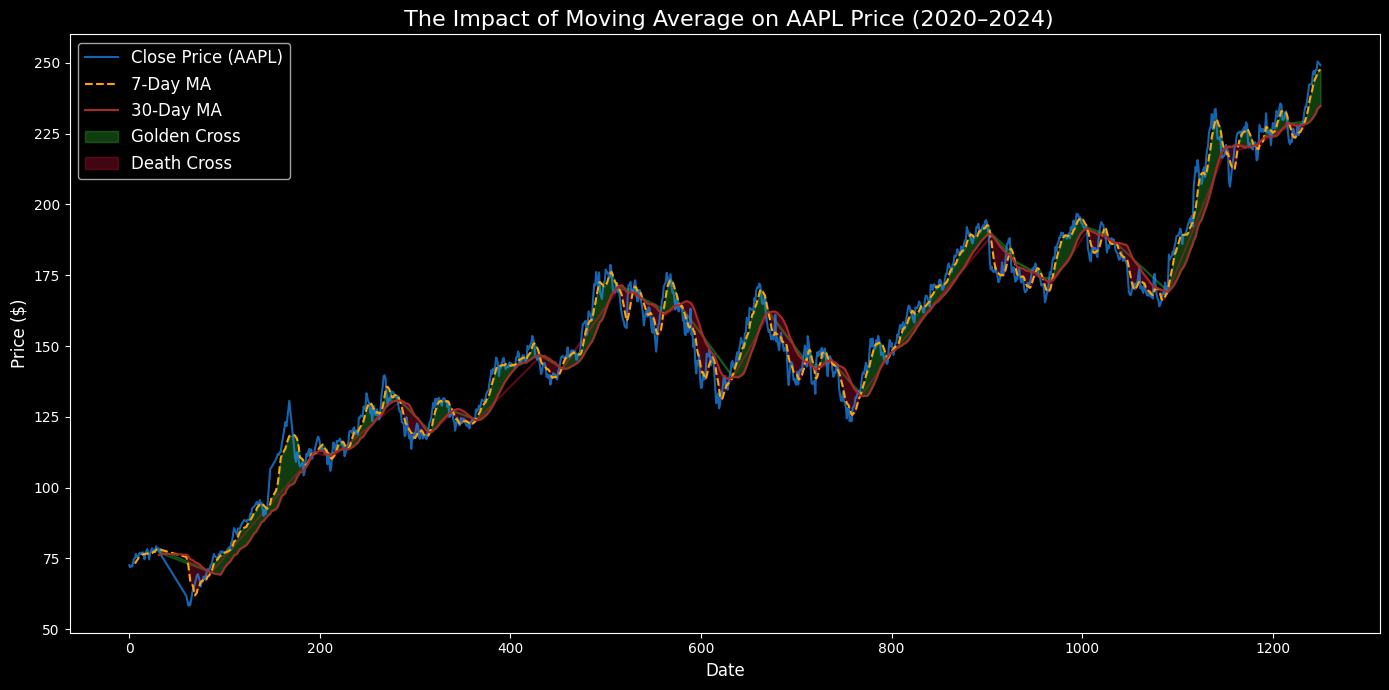

In [ ]:
ma_df = stock_data_iqr.copy()
ma_df['MA_7'] = ma_df['Close'].rolling(window=7).mean()
ma_df['MA_30'] = ma_df['Close'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.style.use('dark_background')

plt.plot(ma_df.index, ma_df['Close'], label='Close Price (AAPL)', color='dodgerblue', alpha=0.7)

plt.plot(ma_df.index, ma_df['MA_7'], label='7-Day MA', color='orange', linestyle='--')
plt.plot(ma_df.index, ma_df['MA_30'], label='30-Day MA', color='brown', linestyle='-')

plt.title(" The Impact of Moving Average on AAPL Price (2020–2024)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)


cross_up = ma_df[ma_df['MA_7'] > ma_df['MA_30']].index
cross_down = ma_df[ma_df['MA_7'] < ma_df['MA_30']].index

plt.fill_between(cross_up, ma_df.loc[cross_up, 'MA_7'], ma_df.loc[cross_up, 'MA_30'],
                 color='limegreen', alpha=0.3, label='Golden Cross')
plt.fill_between(cross_down, ma_df.loc[cross_down, 'MA_7'], ma_df.loc[cross_down, 'MA_30'],
                 color='crimson', alpha=0.3, label='Death Cross')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


## Balancing Dataset

In [ ]:
data = stock_data_iqr.copy()

data = data.drop(columns=['Date'])

data['Target'] = (data['Close'].diff().shift(-1) > 0).astype(int)
data = data.dropna()


In [ ]:
print("dataset shape:", data.shape)
print(data[['Target']].value_counts(normalize=True))


dataset shape: (1181, 6)
Target
1         0.536833
0         0.463167
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Target'])
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
balanced_df = pd.DataFrame(X_train_smote, columns=X_train.columns)
balanced_df['Target'] = y_train_smote.reset_index(drop=True)

balanced_df.to_csv('balanced_df.csv', index=False)


In [ ]:
print("Final dataset shape:", balanced_df.shape)
print(balanced_df[['Target']].value_counts(normalize=True))


Final dataset shape: (1014, 6)
Target
0         0.5
1         0.5
Name: proportion, dtype: float64


In [ ]:
print(balanced_df.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Target'], dtype='object', name='Price')


## Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = ['High', 'Volume']
target = 'Close'

scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_simple = X_train[['High']]
X_test_simple = X_test[['High']]

lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train)
y_pred_train_simple = lr_simple.predict(X_train_simple)
y_pred_test_simple = lr_simple.predict(X_test_simple)

r2_train = r2_score(y_train, y_pred_train_simple)
r2_test = r2_score(y_test, y_pred_test_simple)
mse = mean_squared_error(y_test, y_pred_test_simple)
mae = mean_absolute_error(y_test, y_pred_test_simple)
rmse = np.sqrt(mse)

print("Simple Linear Regression")
print(f"Train R² Score: {r2_train:.4f}")
print(f"Test R² Score : {r2_test:.4f}")
print(f"MSE           : {mse:.4f}")
print(f"RMSE          : {rmse:.4f}")
print(f"MAE           : {mae:.4f}")



Simple Linear Regression
Train R² Score: 0.9987
Test R² Score : 0.9987
MSE           : 1.6405
RMSE          : 1.2808
MAE           : 0.9915


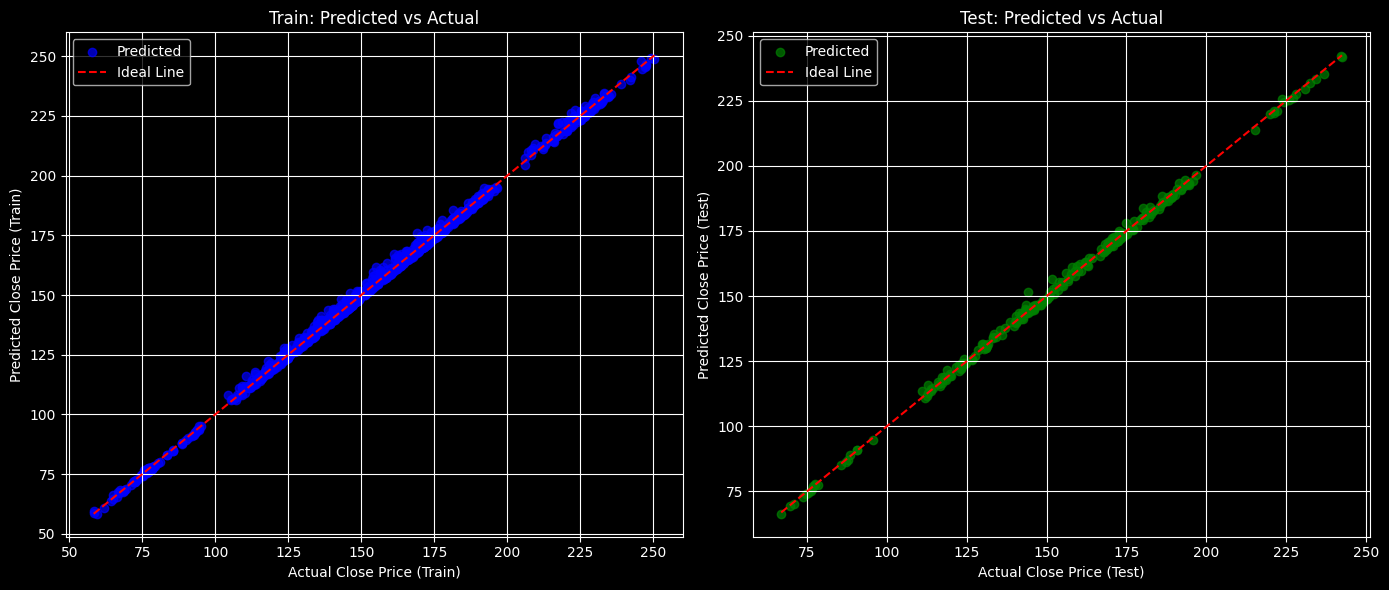

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_simple, alpha=0.7, color='blue', label='Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Ideal Line')
plt.xlabel('Actual Close Price (Train)')
plt.ylabel('Predicted Close Price (Train)')
plt.title('Train: Predicted vs Actual')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_simple, alpha=0.7, color='green', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
plt.xlabel('Actual Close Price (Test)')
plt.ylabel('Predicted Close Price (Test)')
plt.title('Test: Predicted vs Actual')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Classification

### KKN

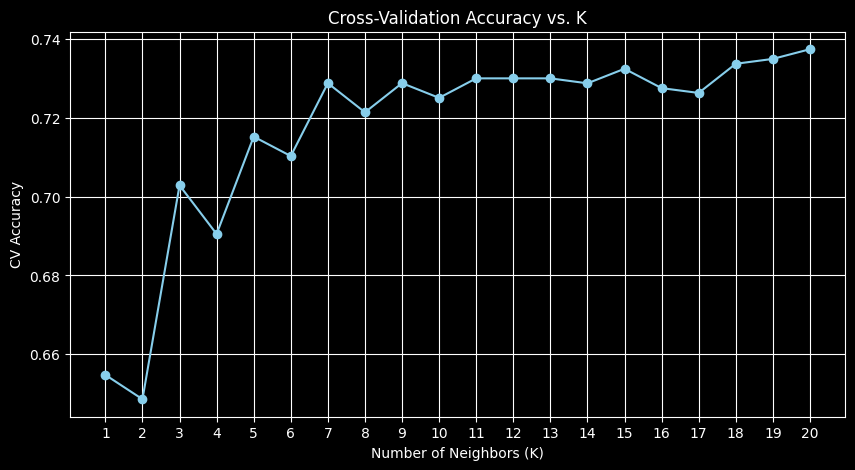

 Best K: 20

 KNN Classification Results:
Train Accuracy     : 0.7756
Test Accuracy      : 0.7143
Precision          : 0.7283
Recall             : 0.6700
F1 Score           : 0.6979
ROC AUC Score      : 0.8008
Mean Squared Error (Loss): 0.1813


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


df = balanced_df.copy()

df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Target']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

k_range = range(1, 21)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.figure(figsize=(10, 5))
plt.plot(k_range, cv_scores, marker='o', color='skyblue')
plt.title('Cross-Validation Accuracy vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('CV Accuracy')
plt.grid(True)
plt.xticks(k_range)
plt.show()

best_k = k_range[np.argmax(cv_scores)]
print(f" Best K: {best_k}")


best_knn = KNeighborsClassifier(n_neighbors=8)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:, 1]


print("\n KNN Classification Results:")
print(f"Train Accuracy     : {best_knn.score(X_train, y_train):.4f}")
print(f"Test Accuracy      : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision          : {precision_score(y_test, y_pred):.4f}")
print(f"Recall             : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score           : {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score      : {roc_auc_score(y_test, y_proba):.4f}")
print(f"Mean Squared Error (Loss): {mean_squared_error(y_test, y_proba):.4f}")

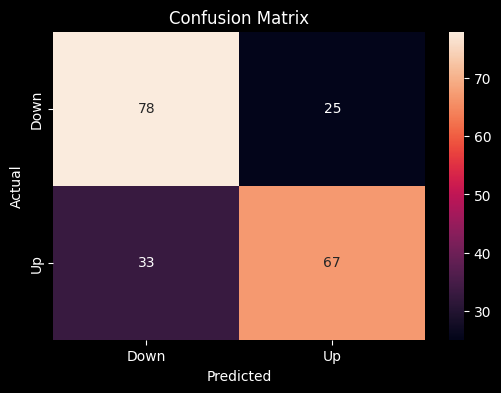

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

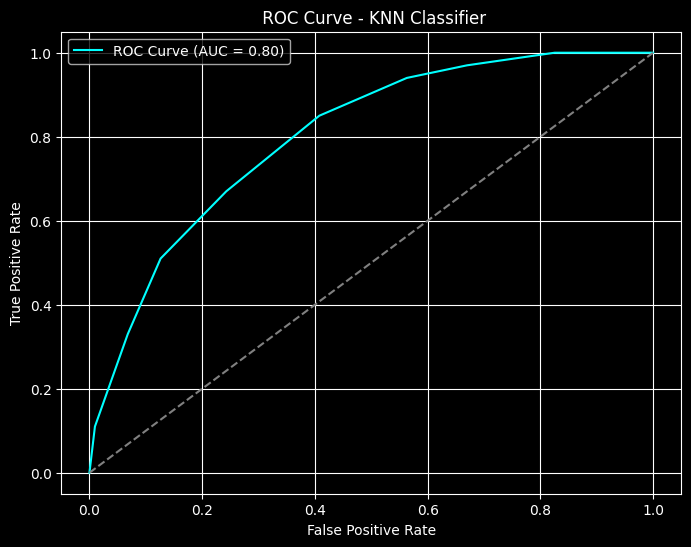

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='cyan', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(' ROC Curve - KNN Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.style.use('dark_background')
plt.show()

### DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, mean_squared_error, roc_curve)
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = balanced_df.copy()
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)

X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Target']


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)[:, 1]


train_acc = accuracy_score(y_train, dt.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
mse= mean_squared_error(y_test, y_proba)

print("\nDecision Tree Metrics:")
print(f"Train Accuracy     : {train_acc:.4f}")
print(f"Test Accuracy      : {test_acc:.4f}")
print(f"Precision          : {precision:.4f}")
print(f"Recall             : {recall:.4f}")
print(f"F1 Score           : {f1:.4f}")
print(f"ROC AUC Score      : {roc_auc:.4f}")
print(f"Mean Squared Error (Loss): {mse:.4f}")



Decision Tree Metrics:
Train Accuracy     : 0.7990
Test Accuracy      : 0.7635
Precision          : 0.7699
Recall             : 0.7982
F1 Score           : 0.7838
ROC AUC Score      : 0.8241
Mean Squared Error (Loss): 0.1711


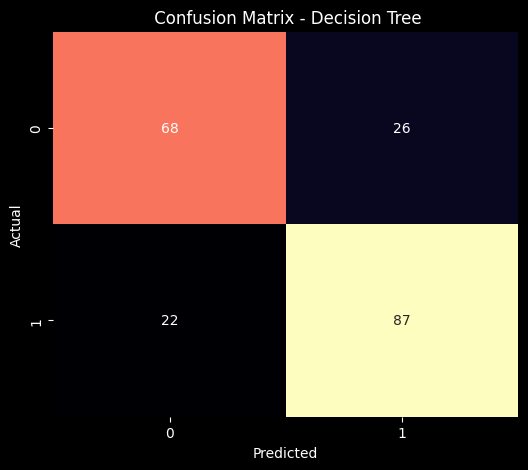

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma', cbar=False)
plt.title(" Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


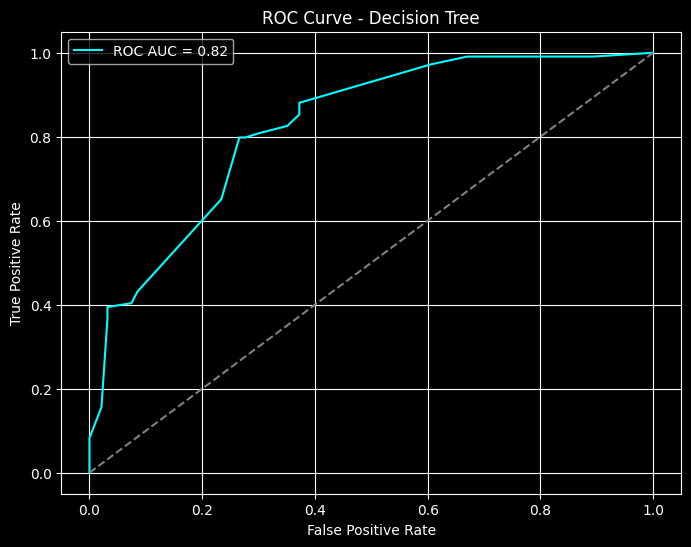

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='cyan', label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.style.use('dark_background')
plt.show()

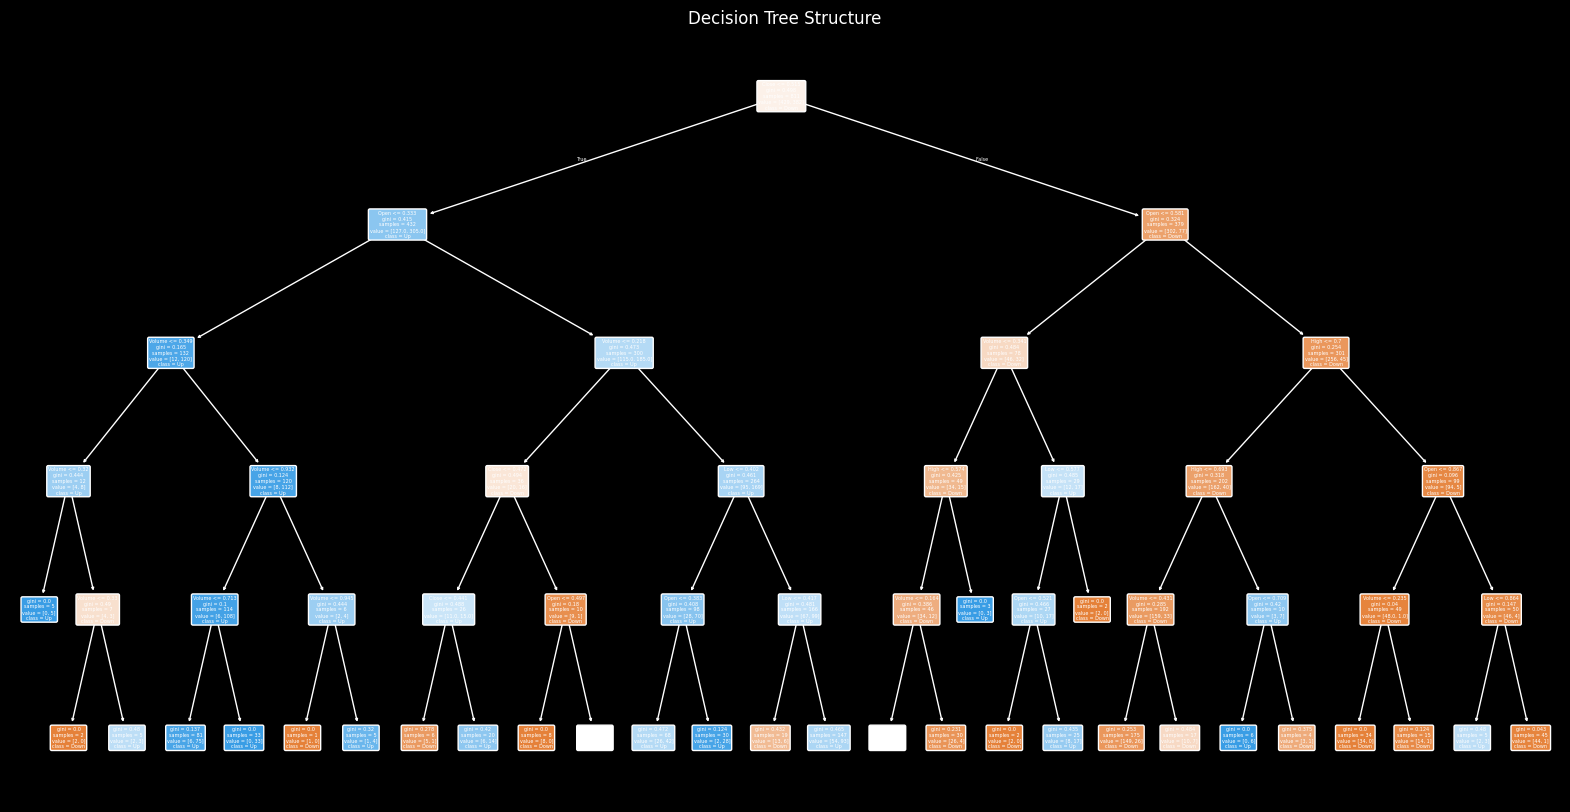

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['Down', 'Up'], filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()

### SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, r2_score, mean_absolute_error, mean_squared_error,
    classification_report, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

df = balanced_df.copy()
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)

X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Target']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_proba = svm.predict_proba(X_test)[:, 1]

train_acc = accuracy_score(y_train, dt.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
mse= mean_squared_error(y_test, y_proba)

print("\nSVM Metrics:")
print(f"Train Accuracy     : {train_acc:.4f}")
print(f"Test Accuracy      : {test_acc:.4f}")
print(f"Precision          : {precision:.4f}")
print(f"Recall             : {recall:.4f}")
print(f"F1 Score           : {f1:.4f}")
print(f"ROC AUC Score      : {roc_auc:.4f}")
print(f"Mean Squared Error (Loss): {mse:.4f}")


SVM Metrics:
Train Accuracy     : 0.7990
Test Accuracy      : 0.7586
Precision          : 0.7542
Recall             : 0.8165
F1 Score           : 0.7841
ROC AUC Score      : 0.8506
Mean Squared Error (Loss): 0.1652


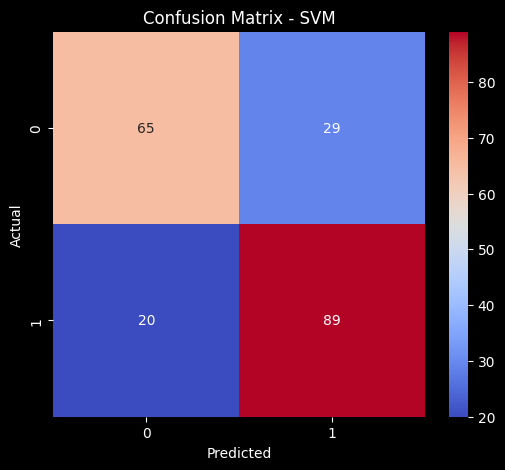

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

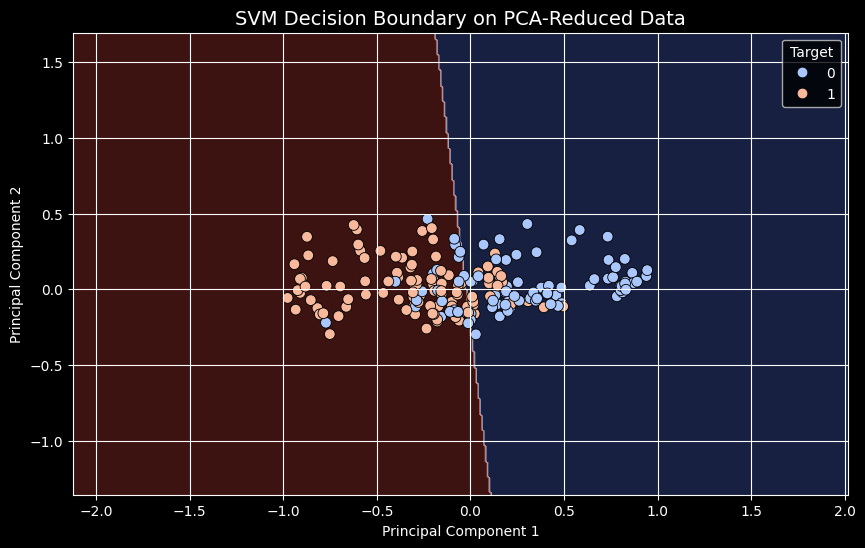

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_vis = SVC(kernel='linear', C=1.0, gamma='scale')
svm_vis.fit(X_train_pca, y_train_pca)


h = 0.01
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test_pca, palette='coolwarm', s=60, edgecolor='k')
plt.title("SVM Decision Boundary on PCA-Reduced Data", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


### ANN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    mean_squared_error, r2_score, mean_absolute_error
)
import seaborn as sns
import matplotlib.pyplot as plt

df = balanced_df.copy()
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)

X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Target']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
y_train_pred = mlp.predict(X_train)
y_pred_proba = mlp.predict_proba(X_test)[:, 1]

train_acc = accuracy_score(y_train, dt.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
mse= mean_squared_error(y_test, y_pred_proba)

print("\n ANN Metrics:")
print(f"Train Accuracy     : {train_acc:.4f}")
print(f"Test Accuracy      : {test_acc:.4f}")
print(f"Precision          : {precision:.4f}")
print(f"Recall             : {recall:.4f}")
print(f"F1 Score           : {f1:.4f}")
print(f"ROC AUC Score      : {roc_auc:.4f}")
print(f"Mean Squared Error (Loss): {mse:.4f}")


 ANN Metrics:
Train Accuracy     : 0.7990
Test Accuracy      : 0.7635
Precision          : 0.7961
Recall             : 0.7523
F1 Score           : 0.7736
ROC AUC Score      : 0.8604
Mean Squared Error (Loss): 0.1543


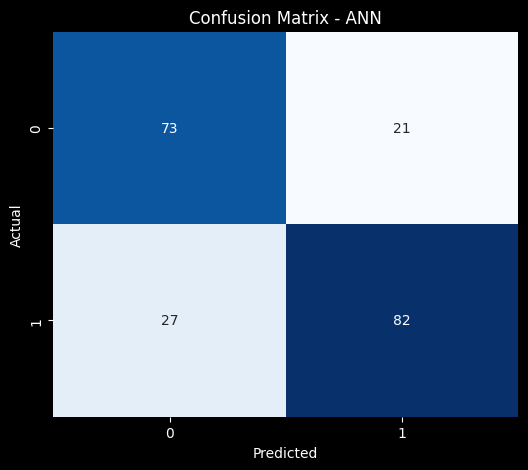

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


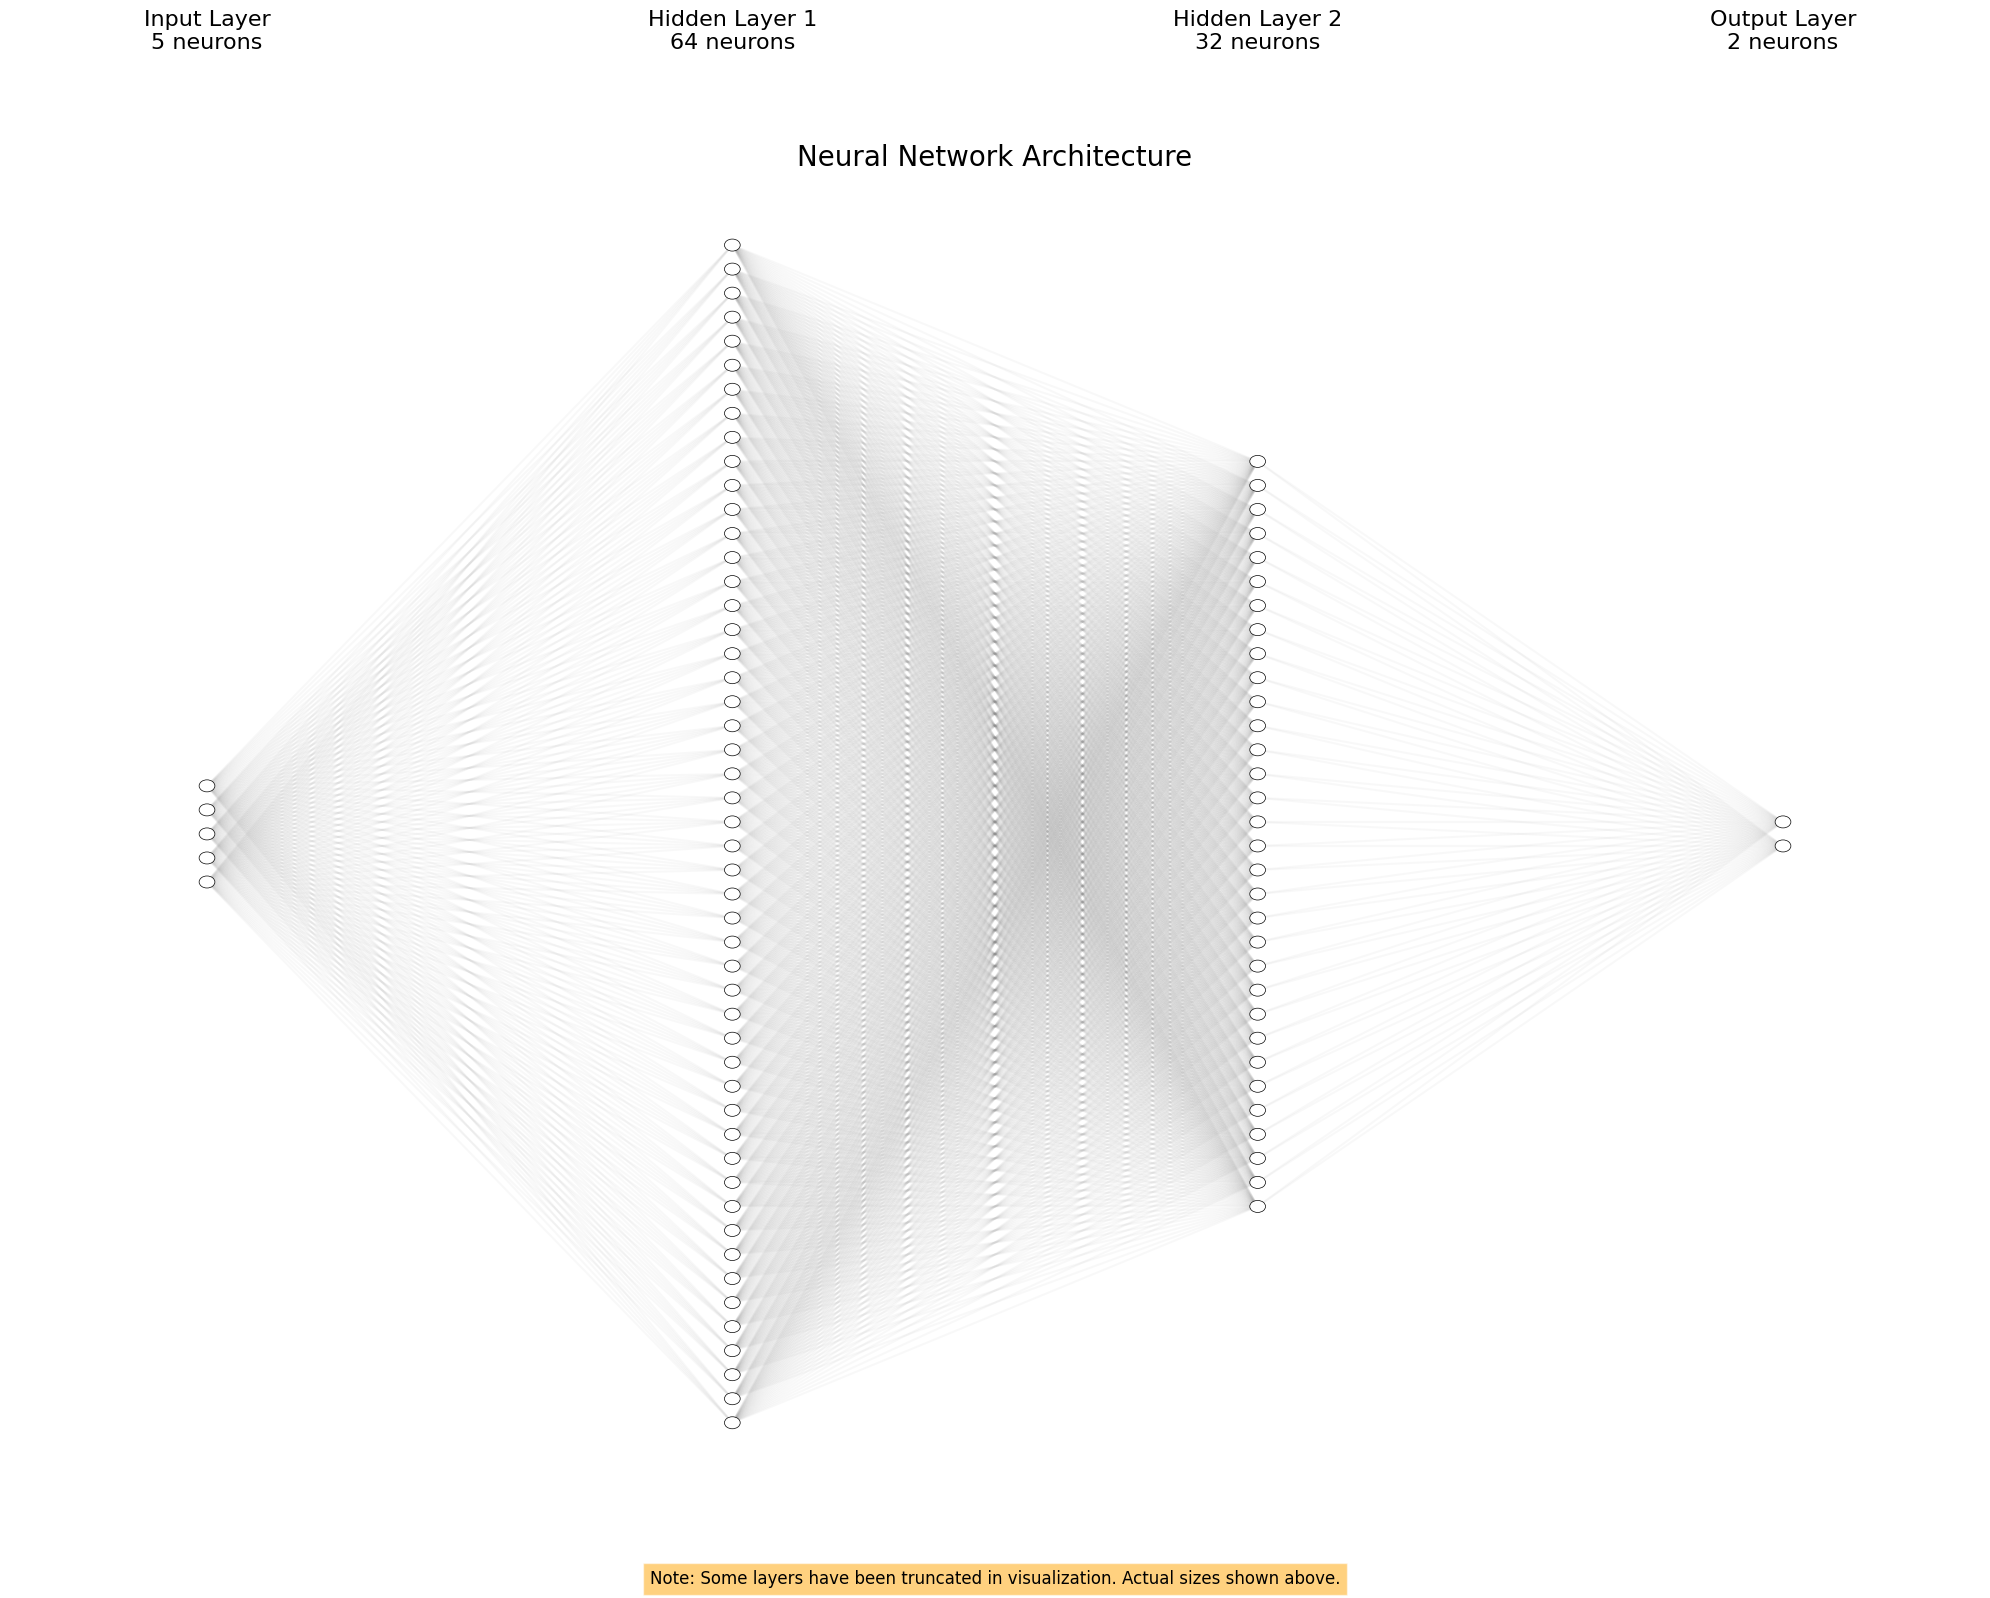

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


def draw_neural_network(ax, layer_sizes):
    left = .1
    right = .9
    bottom = .1
    top = .9

    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 4.,
                                color='white', ec='black', zorder=4, linewidth=0.5)
            ax.add_artist(circle)

    #  connections
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing],
                                  c='gray', alpha=0.05)
                ax.add_artist(line)

input_layer_size = X.shape[1]
hidden_layer_sizes = mlp.hidden_layer_sizes
if isinstance(hidden_layer_sizes, int):
    hidden_layer_sizes = [hidden_layer_sizes]
output_layer_size = 2

max_neurons_to_show = 50
layer_sizes = [min(input_layer_size, max_neurons_to_show)] + \
              [min(h, max_neurons_to_show) for h in hidden_layer_sizes] + \
              [min(output_layer_size, max_neurons_to_show)]


fig = plt.figure(figsize=(20, 16), facecolor='white')
ax = fig.gca()
ax.set_facecolor('black')
ax.axis('off')


draw_neural_network(ax, layer_sizes)


x_pos = np.linspace(0.1, 0.9, len(layer_sizes))
layer_names = ['Input Layer'] + [f'Hidden Layer {i+1}' for i in range(len(hidden_layer_sizes))] + ['Output Layer']
neuron_counts = [input_layer_size] + list(hidden_layer_sizes) + [output_layer_size]

for i, (x, name, count) in enumerate(zip(x_pos, layer_names, neuron_counts)):
    plt.text(x, 1.02, f"{name}\n{count} neurons", ha='center', va='bottom', fontsize=16, color='black')

plt.text(0.5, 0.95, "Neural Network Architecture", fontsize=20, ha='center', va='center', color='black')

if any(actual > shown for actual, shown in zip(neuron_counts, layer_sizes)):
    plt.figtext(0.5, 0.01, "Note: Some layers have been truncated in visualization. Actual sizes shown above.",
                ha="center", fontsize=12, bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5}, color='black')

plt.tight_layout()
plt.show()


## Clustring

### DBSCAN

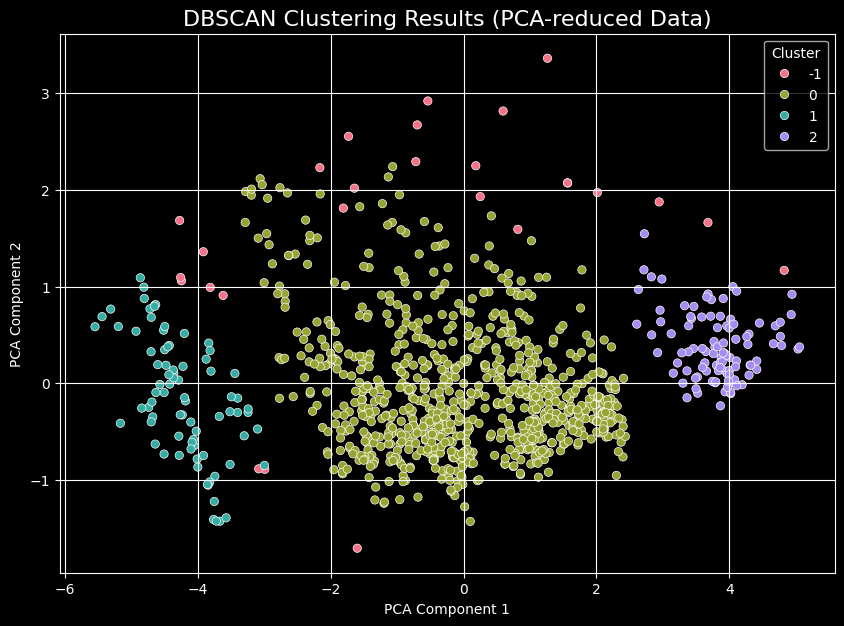

DBSCAN found 3 clusters.
 Number of noise points: 27
 Silhouette Score (excluding noise): 0.4336


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


features = ['Close', 'High', 'Low', 'Open', 'Volume']
X = balanced_df[features]
X_scaled = StandardScaler().fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


dbscan = DBSCAN(eps=0.4, min_samples=5)
clusters = dbscan.fit_predict(X_pca)

balanced_df['DBSCAN_Cluster'] = clusters

plt.figure(figsize=(10, 7))
palette = sns.color_palette("husl", len(set(clusters)))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette=palette, legend='full')
plt.title("DBSCAN Clustering Results (PCA-reduced Data)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

if n_clusters >= 2:
    print(f"DBSCAN found {n_clusters} clusters.")
    print(f" Number of noise points: {n_noise}")

    mask = clusters != -1
    sil_score = silhouette_score(X_scaled[mask], clusters[mask])
    print(f" Silhouette Score (excluding noise): {sil_score:.4f}")
else:
    print(f"DBSCAN found {n_clusters} cluster(s). Silhouette score not defined.")
    print(f"Number of noise points: {n_noise}")


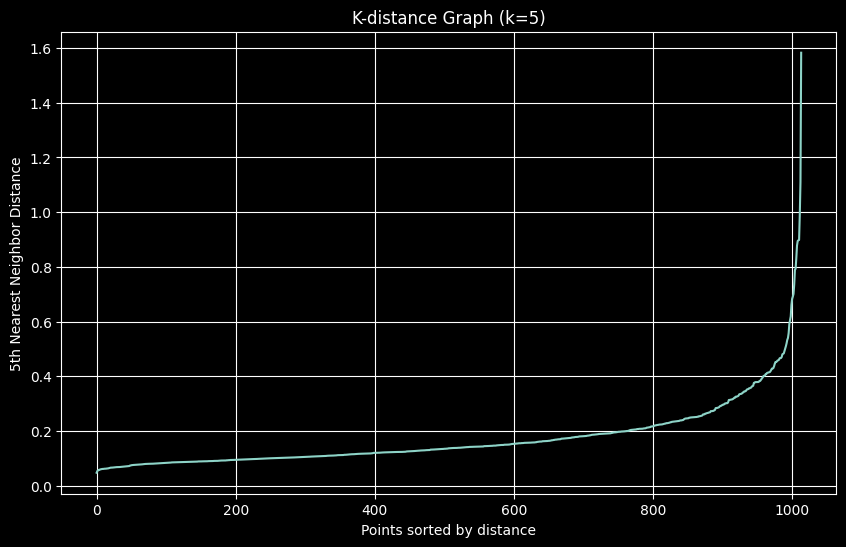

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)


k = 5
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)


k_distances = np.sort(distances[:, -1])
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.title(f'K-distance Graph (k={k})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}th Nearest Neighbor Distance')
plt.grid(True)
plt.show()


In [ ]:
cluster_labels = balanced_df[['DBSCAN_Cluster']].copy()
cluster_labels['Target'] = y.values

cluster_analysis = cluster_labels.groupby('DBSCAN_Cluster')['Target'].value_counts(normalize=True).unstack()
print("Class distribution in each cluster:\n")
print(cluster_analysis.fillna(0).round(2))


Class distribution in each cluster:

Target             0     1
DBSCAN_Cluster            
-1              0.44  0.56
 0              0.51  0.49
 1              0.06  0.94
 2              0.95  0.05


### K-means

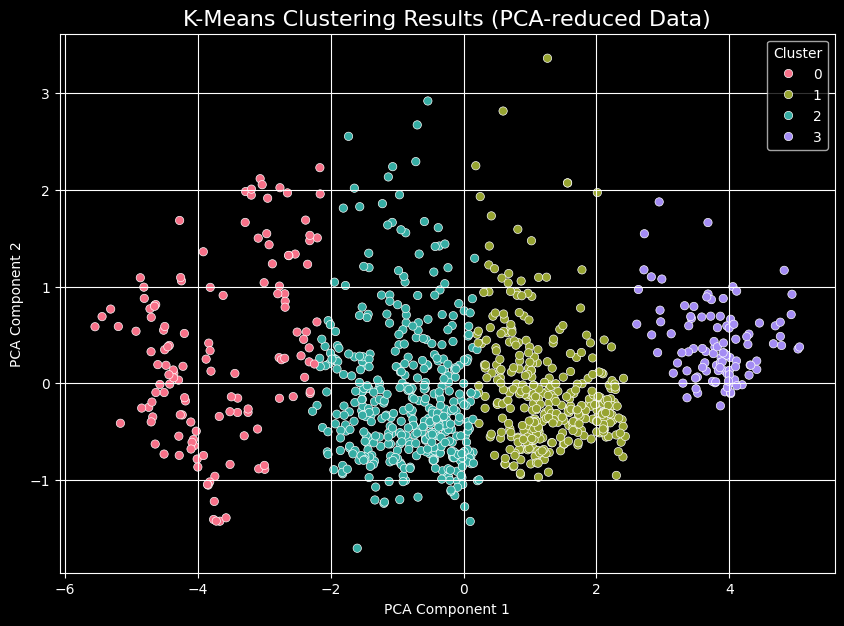

Silhouette Score: 0.4720

Target Proportions in Each K-Means Cluster:
Target                 0         1
KMeans_Cluster                    
0               0.436090  0.563910
1               0.531250  0.468750
2               0.516432  0.483568
3               0.407767  0.592233


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns


features = ['Close', 'High', 'Low', 'Open', 'Volume']
X = balanced_df[features]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_scaled)

balanced_df['KMeans_Cluster'] = clusters_kmeans

plt.figure(figsize=(10, 7))
palette = sns.color_palette("husl", k)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_kmeans, palette=palette, legend='full')
plt.title("K-Means Clustering Results (PCA-reduced Data)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()


sil_score = silhouette_score(X_scaled, clusters_kmeans)
ari_score = adjusted_rand_score(balanced_df['Target'], clusters_kmeans)

print(f"Silhouette Score: {sil_score:.4f}")

cluster_target_dist = balanced_df.groupby('KMeans_Cluster')['Target'].value_counts(normalize=True).unstack().fillna(0)
print("\nTarget Proportions in Each K-Means Cluster:")
print(cluster_target_dist)


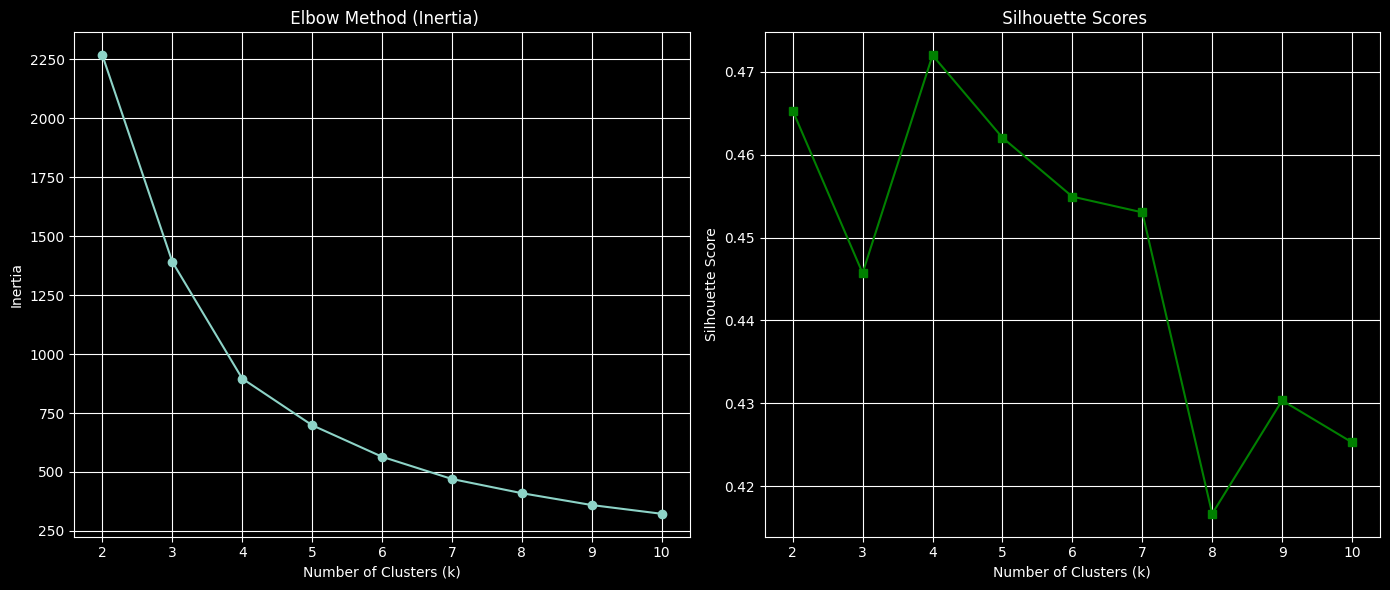

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = ['Close', 'High', 'Low', 'Open', 'Volume']
X = balanced_df[features]
X_scaled = StandardScaler().fit_transform(X)

inertia_scores = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, clusters))


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_scores, marker='o', linestyle='-')
plt.title(' Elbow Method (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='s', color='green')
plt.title(' Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()


### Agglomerative

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

features = ['Close', 'High', 'Low', 'Open', 'Volume']
X = balanced_df[features]
y = balanced_df['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

linked = linkage(X_scaled, method='ward')

n_clusters = 3
agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = agg.fit_predict(X_scaled)

balanced_df['Hierarchical_Cluster'] = clusters

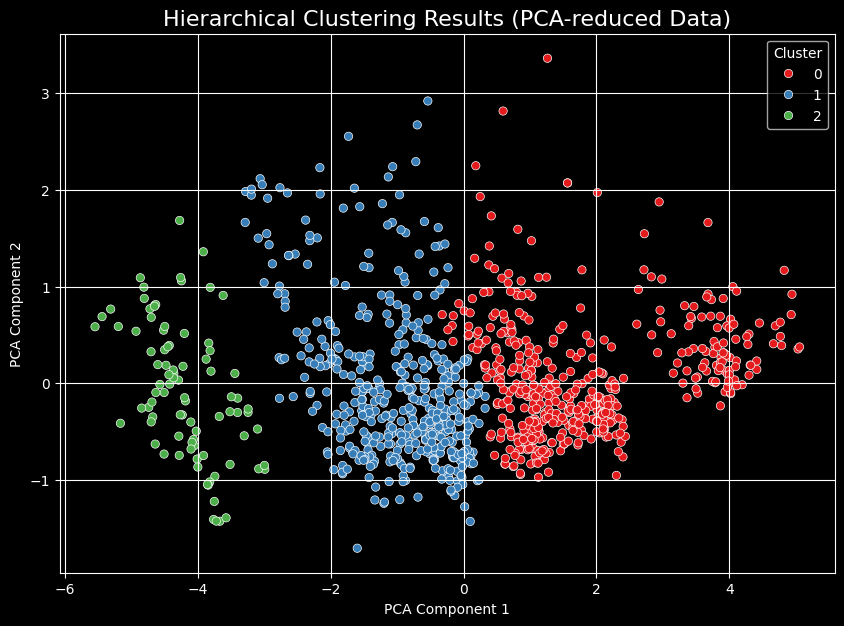

In [ ]:
plt.figure(figsize=(10, 7))
palette = sns.color_palette("Set1", n_clusters)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette=palette, legend='full')
plt.title("Hierarchical Clustering Results (PCA-reduced Data)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [ ]:
sil_score = silhouette_score(X_scaled, clusters)
ari_score = adjusted_rand_score(y, clusters)

print(f" Silhouette Score: {sil_score:.4f}")

 Silhouette Score: 0.4477


In [ ]:

cluster_counts = pd.crosstab(balanced_df['Hierarchical_Cluster'], y, normalize='index')
print("\nTarget Proportions in Each Hierarchical Cluster:")
print(cluster_counts)


Target Proportions in Each Hierarchical Cluster:
Target                       0         1
Hierarchical_Cluster                    
0                     0.509677  0.490323
1                     0.505423  0.494577
2                     0.420455  0.579545
